In [1]:
import numpy as np
import cobra
import snek
import matplotlib.pyplot as plt

d4p3 = cobra.io.read_sbml_model("../models/ecoli_core_btdl_pathway.xml")
simulation_solutions = {}

In [2]:
def printer(text,bottom=False,top=False):
    if top:
        print("-"*len(text))
    print(text)
    if bottom:
        print("-"*len(text))

In [3]:
process_parameters = {}

def pack_params(X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2):
    params = dict(locals())
    return params

# DOUBLE 003
X0 = 16.228935765758205
Vdot = 0.18940000251797834
Gf = 739.1651766008468
g1, g2 = -6.747300067347728 , -1.8261309352974746
x1, x2 = 0.18940000251797834 , 0.005342490889683391
d1, d2 = 3.2634000261560967 , 1.3499999865803456
a1, a2 = 1.883325718497557 , -1.8302019046198164
b1, b2 = 1.3800743076585398 , 3.180201891200162
process_parameters["conti_optP"] = pack_params(X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2)
process_parameters["conti_optP"]["input"] = [X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2]
process_parameters["conti_optP"]["t_end"] = 100
process_parameters["conti_optP"]["max_y"] = 45
process_parameters["conti_optP"]["id"] = "optP"
process_parameters["conti_optP"]["name"] = r"opt. $\mathcal{P}$"


#A 0.002163525032336278 -4.49647970407026e-9
#X 15.893897912129425 16.700000166864708
#B 351.1125969867067 554.8096392794511
#G 275.535943078261 6.537694265903616e-23
#Objective 61.40646929198895
#----------------
X0 = 15.893897912129425
Vdot = 0.11068024948474126
Gf = 942.2165396238195
g1, g2 = -4.642560003860788 , -1.8261309351615922
x1, x2 = 0.11068024948474126 , 0.00534249088460123
d1, d2 = 2.4450559268760204 , 1.349999986527513
a1, a2 = 1.506612736971959e-5 , -1.4338921294868129e-5
b1, b2 = 2.4450408607486507 , 1.350014325448808
process_parameters["conti_optP_minT"] = pack_params(X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2)
process_parameters["conti_optP_minT"]["input"] = [X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2]
process_parameters["conti_optP_minT"]["t_end"] = 100
process_parameters["conti_optP_minT"]["max_y"] = 70
process_parameters["conti_optP_minT"]["id"] = "optP_minT"
process_parameters["conti_optP_minT"]["name"] = r"opt. $\mathcal{P}$, min $\mathcal{T}$"

In [4]:
def derivatives(t,I):
    X1, X2, G1, G2, A1, A2, B1, B2 = I
    X0,Vdot,Gf,g1,g2,x1,x2,d1,d2,a1,a2,b1,b2 = process_parameters[PROCESS_VERSION]["input"]
    
    dA1_dt = - Vdot*A1           + a1*X1
    dA2_dt =   Vdot*A1 - Vdot*A2 + a2*X2
    
    dB1_dt = - Vdot*B1           + b1*X1
    dB2_dt =   Vdot*B1 - Vdot*B2 + b2*X2
    
    dG1_dt = - Vdot*G1 + Vdot*Gf + g1*X1
    dG2_dt =   Vdot*G1 - Vdot*G2 + g2*X2
    
    dX1_dt = - Vdot*X1           + x1*X1
    dX2_dt =   Vdot*X1 - Vdot*X2 + x2*X2
    
    derivatives = [dX1_dt,dX2_dt,dG1_dt,dG2_dt,dA1_dt,dA2_dt,dB1_dt,dB2_dt]
    return derivatives

In [5]:
from scipy.integrate import solve_ivp

for PROCESS_VERSION in ["conti_optP","conti_optP_minT"]:
    print(PROCESS_VERSION)

    t_end = process_parameters[PROCESS_VERSION]["t_end"]
    t_eval = np.linspace(0,t_end,int(1000+1))

    I = [process_parameters[PROCESS_VERSION]["X0"],0,0,0,0,0,0,0]
    sol = solve_ivp(derivatives, [0,t_end], I, t_eval=t_eval,rtol=1e-8,atol=1e-8,max_step=1)

    def pack_params(tt,X1,X2,G1,G2,A1,A2,B1,B2):
        params = dict(locals())
        return params

    tt = sol.t
    X1 = sol.y[0,:]
    X2 = sol.y[1,:]
    G1 = sol.y[2,:]*d4p3.metabolites.glc__D_e.formula_weight/1000
    G2 = sol.y[3,:]*d4p3.metabolites.glc__D_e.formula_weight/1000
    A1 = sol.y[4,:]*d4p3.metabolites.acoin_c.formula_weight/1000
    A2 = sol.y[5,:]*d4p3.metabolites.acoin_c.formula_weight/1000
    B1 = sol.y[6,:]*d4p3.metabolites.bt23dl_c.formula_weight/1000
    B2 = sol.y[7,:]*d4p3.metabolites.bt23dl_c.formula_weight/1000

    process_parameters[PROCESS_VERSION]["sol"] = pack_params(tt,X1,X2,G1,G2,A1,A2,B1,B2)
    process_parameters[PROCESS_VERSION]["sol"]["input"] = [tt,X1,X2,G1,G2,A1,A2,B1,B2]
print("done")

conti_optP
conti_optP_minT
done


# FIGURE 7

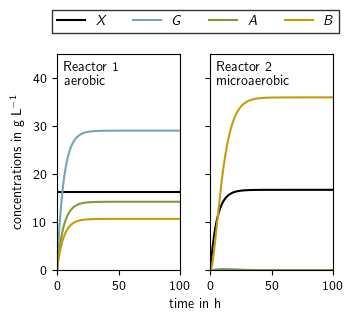

In [6]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath}\sansmath'

    
PROCESS_VERSION = "conti_optP"
tt,X1,X2,G1,G2,A1,A2,B1,B2 = process_parameters[PROCESS_VERSION]["sol"]["input"]

fig = plt.figure(dpi=100,figsize=(4,3.5))

# Set the centered xlabel on the hidden subplot
ax0 = fig.add_subplot(111, frame_on=False)
ax0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax0.grid(False)
ax0.set_xlabel('time in h')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(tt,X1,label=r"$X$",color="k")
ax2.plot(tt,X2,color="k")
ax1.plot(tt,G1,label=r"$G$",color="#77a5b8")
ax2.plot(tt,G2,color="#77a5b8")
ax1.plot(tt,A1,label=r"$A$",color="#84993a")
ax2.plot(tt,A2,color="#84993a")
ax1.plot(tt,B1,label=r"$B$",color="#c39e08")
ax2.plot(tt,B2,color="#c39e08")
ax1.set_title("~~\n~~")

ax1.set_ylabel(r"concentrations in g\;L$^{-1}$")

for ax in [ax1,ax2]:
    ax.set_ylim(0,process_parameters[PROCESS_VERSION]["max_y"])
    ax.set_xlim(0,process_parameters[PROCESS_VERSION]["t_end"])

ax2.set_yticklabels([])

# Panel Legends
if process_parameters[PROCESS_VERSION]["id"] == "optP":
    reactornames = ['Reactor 1\naerobic','Reactor 2\nmicroaerobic','C','D','E','F']
elif process_parameters[PROCESS_VERSION]["id"] == "optP_minT":
    reactornames = ['Reactor 1\n','Reactor 2\nmicroaerobic','C','D','E','F']
elif process_parameters[PROCESS_VERSION]["id"] == "optT":
    reactornames = ['Reactor 1\nmicroaerobic','Reactor 2\nmicroaerobic','C','D','E','F']
if True:
    import matplotlib.transforms as mtransforms
    for name, ax in zip(reactornames,[ax1,ax2]):
        trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
        ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
                verticalalignment='top', fontfamily='sans',
                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

fig.align_ylabels()
fig.tight_layout()
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
legend_x = (ax1_pos.x0 + ax2_pos.x1) / 2
fig.legend(loc='center', bbox_to_anchor=(legend_x, .93), ncol=4)
fig.tight_layout()

fig.show()

# SUPPLEMENTARY FIGURE S7

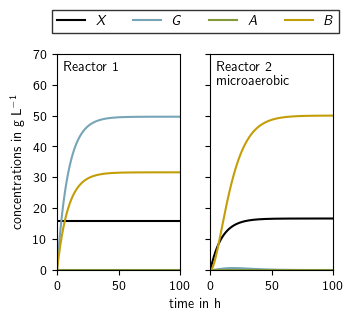

In [7]:
PROCESS_VERSION = "conti_optP_minT"
tt,X1,X2,G1,G2,A1,A2,B1,B2 = process_parameters[PROCESS_VERSION]["sol"]["input"]

fig = plt.figure(dpi=100,figsize=(4,3.5))

# Set the centered xlabel on the hidden subplot
ax0 = fig.add_subplot(111, frame_on=False)
ax0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax0.grid(False)
ax0.set_xlabel('time in h')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(tt,X1,label=r"$X$",color="k")
ax2.plot(tt,X2,color="k")
ax1.plot(tt,G1,label=r"$G$",color="#77a5b8")
ax2.plot(tt,G2,color="#77a5b8")
ax1.plot(tt,A1,label=r"$A$",color="#84993a")
ax2.plot(tt,A2,color="#84993a")
ax1.plot(tt,B1,label=r"$B$",color="#c39e08")
ax2.plot(tt,B2,color="#c39e08")
ax1.set_title("~~\n~~")

ax1.set_ylabel(r"concentrations in g\;L$^{-1}$")

for ax in [ax1,ax2]:
    ax.set_ylim(0,process_parameters[PROCESS_VERSION]["max_y"])
    ax.set_xlim(0,process_parameters[PROCESS_VERSION]["t_end"])

ax2.set_yticklabels([])

# Panel Legends
if process_parameters[PROCESS_VERSION]["id"] == "optP":
    reactornames = ['Reactor 1\naerobic','Reactor 2\nmicroaerobic','C','D','E','F']
elif process_parameters[PROCESS_VERSION]["id"] == "optP_minT":
    reactornames = ['Reactor 1\n','Reactor 2\nmicroaerobic','C','D','E','F']
elif process_parameters[PROCESS_VERSION]["id"] == "optT":
    reactornames = ['Reactor 1\nmicroaerobic','Reactor 2\nmicroaerobic','C','D','E','F']
if True:
    import matplotlib.transforms as mtransforms
    for name, ax in zip(reactornames,[ax1,ax2]):
        trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
        ax.text(0.0, 1.0, name, transform=ax.transAxes + trans,
                verticalalignment='top', fontfamily='sans',
                bbox=dict(facecolor='none', edgecolor='none', pad=3.0))

fig.align_ylabels()
fig.tight_layout()
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
legend_x = (ax1_pos.x0 + ax2_pos.x1) / 2
fig.legend(loc='center', bbox_to_anchor=(legend_x, .93), ncol=4)
fig.tight_layout()

fig.show()